## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

[[ 0.98202917 -0.88398056 -0.83551929  0.07263782  0.95358065  0.51178511
   0.02564136 -0.17689259 -0.7985821  -0.42791807]
 [-0.70150781 -0.73544627 -0.79614197  0.1407556  -0.23630156 -0.17071703
   0.44561861  0.32447253 -0.14586519  0.4159355 ]
 [-0.93659788 -0.90414366 -0.66369024 -0.32190577  0.42458061  0.40089536
  -0.84037814 -0.78827206  0.69777173 -0.03695505]
 [ 0.24774913 -0.16334772 -0.80696383  0.67264083 -0.35868834 -0.70418961
  -0.35265219 -0.09663847 -0.66699041  0.62953183]
 [ 0.5518125   0.85307223 -0.41982348  0.10252846 -0.22426048  0.96986842
   0.53765589 -0.82146176 -0.17043603 -0.4110313 ]
 [ 0.48809448 -0.19451901  0.19017971  0.19814958  0.60882321 -0.52248388
   0.53827304  0.20077106 -0.05078472  0.2810861 ]
 [ 0.70096659 -0.39520419  0.31076501 -0.27162732  0.13167898 -0.68913139
  -0.2926371  -0.35171602 -0.70862827 -0.31645318]
 [-0.51988316  0.34139709 -0.06494078 -0.88920696 -0.7746461   0.51739431
  -0.91130884 -0.96653596 -0.47753504  0.05343522]


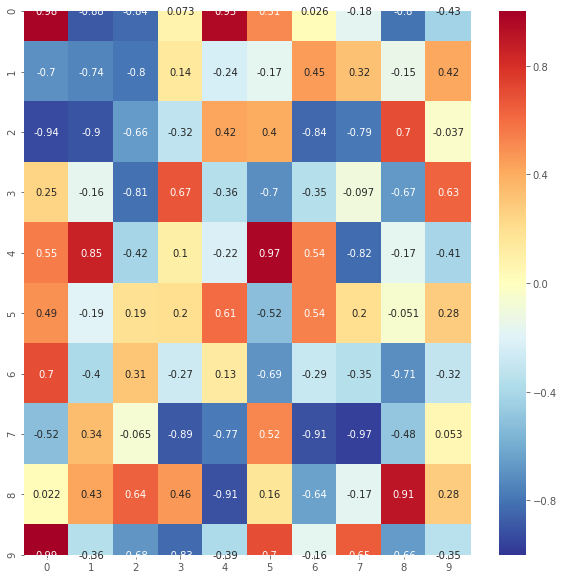

In [37]:
matrix = (np.random.random((10,10)) - 0.5) * 2
print(matrix)
plt.figure(figsize=(10,10))

heatmap = sns.heatmap(matrix, cmap = plt.cm.RdYlBu_r, vmin = -1., vmax = 1., annot = True)
plt.show()

     index         0         1         2
0        2 -0.691741 -0.092013  0.008921
1        1  0.495740  0.428380 -0.834128
2        1 -0.703992 -0.363835 -0.181262
3        1  0.018372 -0.199033  0.481901
4        0 -0.210029 -0.170670  0.294220
..     ...       ...       ...       ...
995      0  0.230250  0.416068  0.006378
996      1 -0.786945  0.666193  0.883463
997      0  0.922942  0.244533  0.953234
998      1  0.827052  0.236745 -0.394916
999      0  0.924787  0.743527 -0.541702

[1000 rows x 4 columns]


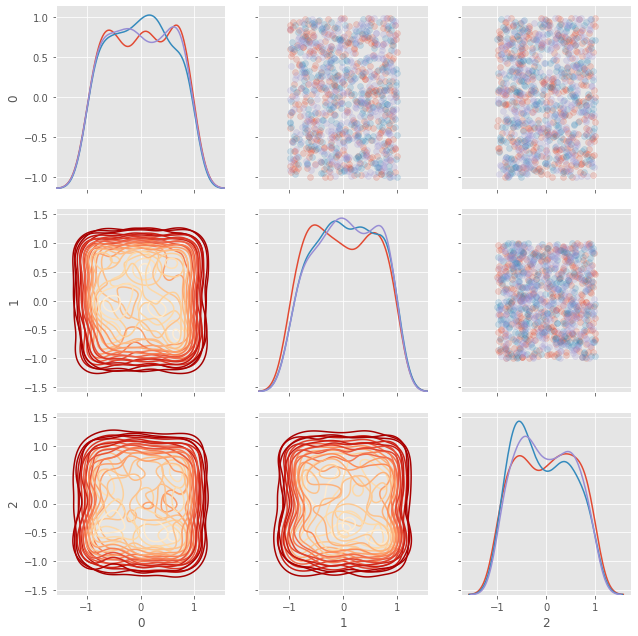

In [44]:
nrow = 1000
ncol = 3

matrix = matrix = (np.random.random((nrow,ncol)) - 0.5)*2

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
#print(indice)
#plot_data = pd.DataFrame(matrix, indice)
#print(plot_data)
plot_data = pd.DataFrame(matrix, indice).reset_index() 
print(plot_data)
# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()

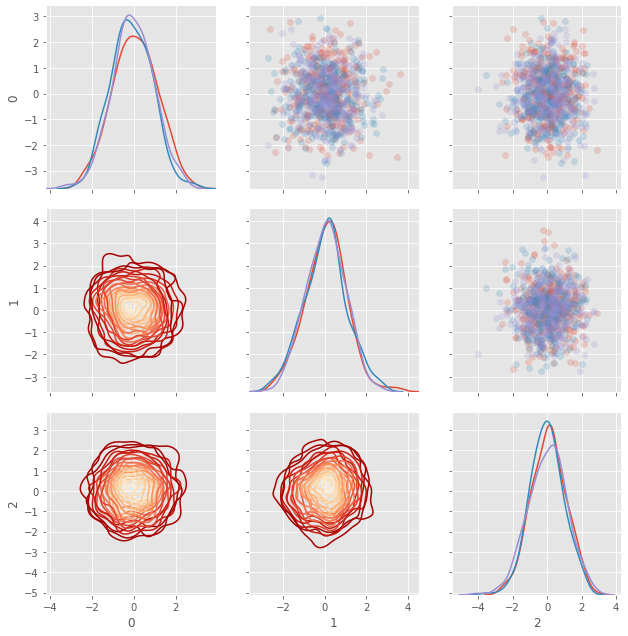

In [50]:
nrow = 1000
ncol = 3
mu, sigma = 0, .1
matrix =np.random.normal(loc=mu, scale=sigma, size=nrow*ncol).reshape(nrow, ncol)


# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])
grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()